## 8.1. Odev_Proje 3 verisi

Koronavirus verisi analizi: https://github.com/Atharva-Peshkar/Covid-19-Patient-Health-Analytics

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

In [42]:
covid = pd.read_csv('covid.csv')
covid.tail()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
1080,1081,Innsbruck,Austria,NaN,24.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,Algeria,Algeria,male,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,Croatia,Croatia,male,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1084,1085,Bern,Switzerland,male,70.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
covid = covid.drop(['symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','sym_on','hosp_vis',
                   'id','location','recov'], axis=1)

In [44]:
covid = pd.get_dummies(data=covid, columns=['country', 'gender'])

In [45]:
covid = covid.dropna()

In [46]:
print(covid.shape)

(839, 44)


In [47]:
X = covid[['age','from_wuhan','country_China','gender_male']]
Y = covid.death
X_egitim,X_test,Y_egitim,Y_test = train_test_split (X,Y,test_size=0.2,random_state=40)

In [48]:
# en yakin gozleme gore tahmin

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_egitim,Y_egitim)
knn1.score(X_test,Y_test)

0.8988095238095238

In [49]:
# simdi de farkli k degerlerine gore bakalim

komsu_sayisi = np.arange(1, 9)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

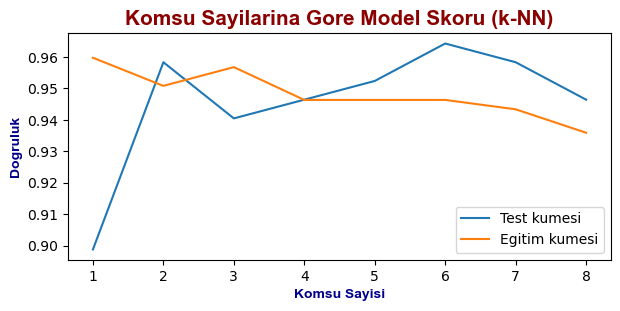

In [50]:
for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_egitim, Y_egitim)
    egitim_kumesi_skoru[i] = knn.score(X_egitim, Y_egitim)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(X_test, Y_test)

plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kumesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Egitim kumesi')
plt.legend()
plt.title('Komsu Sayilarina Gore Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komsu Sayisi', fontdict= eksen_font)
plt.ylabel('Dogruluk', fontdict= eksen_font)
plt.show()

In [55]:
# yukaridaki grafige gore en yuksek dogruluk tahminini 6 farkli komsuya gore elde ettik

knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_egitim,Y_egitim)
knn6.score(X_test,Y_test)

0.9642857142857143

In [56]:
# ilk model icin capraz dogrulama

cvscore_3 = cross_val_score(knn1,X_test,Y_test,cv=3)
print('cv = 3 ---> Ortalama capraz dogrulama skoru: ', np.mean(cvscore_3))
                           
cvscore_10 = cross_val_score(knn1,X_test,Y_test,cv=10)
print('cv = 10 ---> Ortalama capraz dogrulama skoru: ', np.mean(cvscore_10))

# SORU: burada dogrulama skorunu nasil degerlendirmemiz gerekiyor?

cv = 3 ---> Ortalama capraz dogrulama skoru:  0.9345238095238096
cv = 10 ---> Ortalama capraz dogrulama skoru:  0.9117647058823529


In [57]:
# Ikinci model icin capraz dogrulama

cvscore_3 = cross_val_score(knn6,X_test,Y_test,cv=3)
print('cv = 3 ---> Ortalama capraz dogrulama skoru: ', np.mean(cvscore_3))
                           
cvscore_10 = cross_val_score(knn6,X_test,Y_test,cv=10)
print('cv = 10 ---> Ortalama capraz dogrulama skoru: ', np.mean(cvscore_10))

cv = 3 ---> Ortalama capraz dogrulama skoru:  0.9583333333333334
cv = 10 ---> Ortalama capraz dogrulama skoru:  0.9588235294117646


In [58]:
# Normalizasyon

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_olcekli = ss.fit_transform(X)
X_egitim_olcekli,X_test_olcekli,Y_egitim,Y_test = train_test_split(X_olcekli, Y,random_state=40,test_size=0.2)

In [59]:
# ilk modelimizi olceklendirdigimizde dogruluk orani 0.89 dan 0.93 e cikti

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_egitim_olcekli,Y_egitim)
knn1.score(X_test_olcekli,Y_test)

0.9345238095238095

In [60]:
# ikinci modelimizi olceklendirdigimizde dogruluk orani 0.9642 den 0.958 e dustu

knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_egitim_olcekli,Y_egitim)
knn6.score(X_test_olcekli,Y_test)

0.9583333333333334

In [61]:
# Agirliklandirma. Burada biraz daha dusuk bir dogruluk orani elde ettik

from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

knn6 = KNeighborsClassifier(n_neighbors=6, weights='distance')

X_zscore = stats.zscore(X)

X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_zscore, Y, test_size=0.2, random_state = 40)

knn6.fit(X_egitim,Y_egitim)
knn6.score(X_test, Y_test)

0.9404761904761905

Sonuc olarak normallestirme ve agirliklandirma yerine k degerini degistirerek elde ettigimiz model ile daha yuksek bir dogruluk oranina erismis olduk.